Object Detection with Python, Deep Learning, and OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt

In [4]:
config_file = '/content/ssd_mobilenet_v3_large_coco_2020_01_14 (2).pbtxt'
frozen_model = '/content/frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [7]:
classLabels=[]
file_name='/content/labels.txt'
with open(file_name,'rt') as fpt:
  classLabels=fpt.read().rstrip('\n').split('\n')

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [9]:
print(len(classLabels))

91


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x78b927345e50>

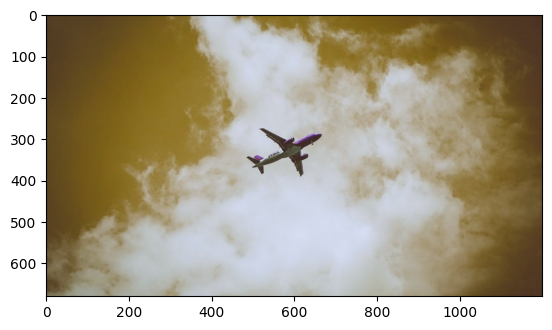

In [16]:
img = cv2.imread('/content/airplane.jpg')
plt.imshow(img)

In [17]:
ClassIndex,Confidece,bbox=model.detect(img, confThreshold=0.5)

In [18]:
print(ClassIndex)

[5]


In [19]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),Confidece.flatten(),bbox):
  cv2.rectangle(img,boxes,(255,0,0),2)
  cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+10),font,fontScale=font_scale,color=(0))

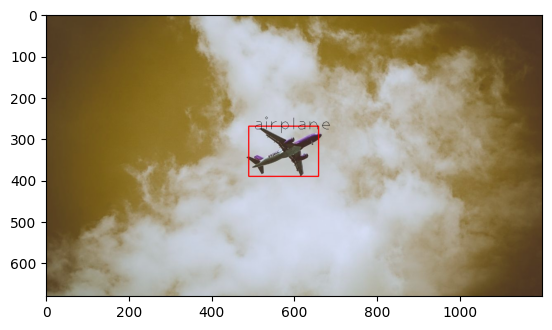

In [20]:
plt.imshow(img)